# Natural Language Processing and Machine Learning

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore')

# Data Preparation   

It will be imported the entire dataset, which will be divided into a training and test one. 

In [2]:
df = pd.read_csv('./customer_data.csv').drop(columns=['Unnamed: 0', 'LIFECL', 'WSAVED', 'SPENDMOR'])
df

,AGE,EDCL,MARRIED,KIDS,OCCAT,INCOME,RISK,NETWORTH,TrueRiskTol
0,47,2,1,0,1,56443.744181,3,352641.71130,6.947439
1,47,2,1,0,1,56443.744181,3,340525.21881,6.223158
2,47,2,1,0,1,56443.744181,3,348696.08426,6.676709
3,47,2,1,0,1,56443.744181,3,351802.87720,6.286854
4,47,2,1,0,1,56443.744181,3,358958.85696,6.177016
...,...,...,...,...,...,...,...,...,...
4805,50,4,2,0,2,78808.246592,2,653876.35532,5.978830
4806,50,4,2,0,2,78808.246592,2,655843.99086,5.941754
4807,50,4,2,0,2,77743.270286,2,654911.95297,5.903461
4808,50,4,2,0,2,77743.270286,2,654911.95297,5.903461


In [3]:
df.shape

(4810, 9)

Before dividing the dataset into training and test one, it is important to remove duplicated values to avoid th e test set to be "contaminated". 

In [4]:
df[df.duplicated(keep=False)].shape

(704, 9)

In [5]:
df_no_dupl = df.drop_duplicates(keep='first')

Checking the number of observations. 

In [6]:
print(f'Number of observations: {df_no_dupl.shape[0]}') 
print(f'Number of observations for the test set: {df_no_dupl.shape[0]/10}')

Number of observations: 4374
Number of observations for the test set: 437.4


In [7]:
train_df = df_no_dupl.sample(frac=0.9, random_state=42)
test_df = df_no_dupl.drop(index=train_df.index)    

It is important to specify the random state in order to obtain the same result at each run.   
After having created a training set, its rows must be removed from the original dataset to create a test set. 

In [8]:
train_df

,AGE,EDCL,MARRIED,KIDS,OCCAT,INCOME,RISK,NETWORTH,TrueRiskTol
1748,52,2,1,0,1,5.111886e+04,3,6.746919e+05,6.680193
502,66,1,1,1,3,5.005389e+04,3,8.864716e+04,1.260122
1791,34,4,1,1,1,1.277972e+05,2,2.572425e+05,41.641618
1657,39,3,1,2,2,1.064976e+05,3,4.370222e+05,39.079881
4184,73,4,1,0,3,1.052197e+06,3,1.695066e+07,0.464278
...,...,...,...,...,...,...,...,...,...
2440,62,4,1,0,2,1.490967e+05,3,3.061227e+06,1.415664
994,64,3,2,0,3,1.490967e+04,4,2.684269e+05,0.807397
541,56,1,2,1,1,2.342948e+04,4,4.704720e+04,3.993526
2551,66,2,1,0,3,3.833915e+04,4,5.813845e+05,1.028866


In [9]:
test_df

,AGE,EDCL,MARRIED,KIDS,OCCAT,INCOME,RISK,NETWORTH,TrueRiskTol
4,47,2,1,0,1,5.644374e+04,3,3.589589e+05,6.177016
16,43,2,1,2,2,2.662441e+04,4,9.458113e+04,14.923956
19,43,2,1,2,2,2.662441e+04,4,7.291643e+04,14.923956
35,46,4,1,2,1,2.279049e+05,2,4.335012e+05,16.812929
36,46,4,1,2,1,2.279049e+05,2,4.406468e+05,16.812929
...,...,...,...,...,...,...,...,...,...
4748,37,4,1,3,2,9.371791e+04,1,2.475078e+05,20.644285
4796,54,4,1,0,2,4.643297e+06,2,4.201523e+07,7.802821
4802,39,4,1,7,1,1.224723e+05,3,1.754199e+06,10.837051
4803,39,4,1,7,1,1.938257e+05,3,1.449837e+06,11.784082


Checking if all the rows in the datasets are different. 

In [10]:
train_df[train_df.index.isin(test_df.index)]

,AGE,EDCL,MARRIED,KIDS,OCCAT,INCOME,RISK,NETWORTH,TrueRiskTol


In [11]:
test_df[test_df.index.isin(train_df.index)]

,AGE,EDCL,MARRIED,KIDS,OCCAT,INCOME,RISK,NETWORTH,TrueRiskTol


The two datasets seem to have been created properly, now they are ready to be exported for future use. 

In [53]:
train_df.to_csv('train_df.csv', index=None) 
test_df.to_csv('test_df.csv', index=None)

# Importing Data

In [12]:
train = pd.read_csv('./train_df.csv').reset_index().drop(columns='index')
test = pd.read_csv('./test_df.csv').reset_index().drop(columns='index')

In [13]:
train

,AGE,EDCL,MARRIED,KIDS,OCCAT,INCOME,RISK,NETWORTH,TrueRiskTol
0,52,2,1,0,1,5.111886e+04,3,6.746919e+05,6.680193
1,66,1,1,1,3,5.005389e+04,3,8.864716e+04,1.260122
2,34,4,1,1,1,1.277972e+05,2,2.572425e+05,41.641618
3,39,3,1,2,2,1.064976e+05,3,4.370222e+05,39.079881
4,73,4,1,0,3,1.052197e+06,3,1.695066e+07,0.464278
...,...,...,...,...,...,...,...,...,...
3932,62,4,1,0,2,1.490967e+05,3,3.061227e+06,1.415664
3933,64,3,2,0,3,1.490967e+04,4,2.684269e+05,0.807397
3934,56,1,2,1,1,2.342948e+04,4,4.704720e+04,3.993526
3935,66,2,1,0,3,3.833915e+04,4,5.813845e+05,1.028866


In [14]:
test

,AGE,EDCL,MARRIED,KIDS,OCCAT,INCOME,RISK,NETWORTH,TrueRiskTol
0,47,2,1,0,1,5.644374e+04,3,3.589589e+05,6.177016
1,43,2,1,2,2,2.662441e+04,4,9.458113e+04,14.923956
2,43,2,1,2,2,2.662441e+04,4,7.291643e+04,14.923956
3,46,4,1,2,1,2.279049e+05,2,4.335012e+05,16.812929
4,46,4,1,2,1,2.279049e+05,2,4.406468e+05,16.812929
...,...,...,...,...,...,...,...,...,...
432,37,4,1,3,2,9.371791e+04,1,2.475078e+05,20.644285
433,54,4,1,0,2,4.643297e+06,2,4.201523e+07,7.802821
434,39,4,1,7,1,1.224723e+05,3,1.754199e+06,10.837051
435,39,4,1,7,1,1.938257e+05,3,1.449837e+06,11.784082


# Exploratory Data Analysis  

## Variables Types and Missing Values

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3937 entries, 0 to 3936
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          3937 non-null   int64  
 1   EDCL         3937 non-null   int64  
 2   MARRIED      3937 non-null   int64  
 3   KIDS         3937 non-null   int64  
 4   OCCAT        3937 non-null   int64  
 5   INCOME       3937 non-null   float64
 6   RISK         3937 non-null   int64  
 7   NETWORTH     3937 non-null   float64
 8   TrueRiskTol  3937 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 276.9 KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          437 non-null    int64  
 1   EDCL         437 non-null    int64  
 2   MARRIED      437 non-null    int64  
 3   KIDS         437 non-null    int64  
 4   OCCAT        437 non-null    int64  
 5   INCOME       437 non-null    float64
 6   RISK         437 non-null    int64  
 7   NETWORTH     437 non-null    float64
 8   TrueRiskTol  437 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 30.9 KB


All the variables are numbers and there are no missing values.

## General Statistics

In [17]:
train.describe()

,AGE,EDCL,MARRIED,KIDS,OCCAT,INCOME,RISK,NETWORTH,TrueRiskTol
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3.937000e+03,3937.000000,3.937000e+03,3937.000000
mean,55.776480,3.321057,1.203962,0.770384,1.707899,1.263967e+06,2.826264,2.008065e+07,10.380741
std,13.360135,0.953196,0.402993,1.094891,0.826407,5.201707e+06,0.813561,8.481391e+07,15.319300
min,22.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,-5.633237e+06,0.450112
25%,46.000000,2.000000,1.000000,0.000000,1.000000,6.496355e+04,2.000000,2.231713e+05,1.010391
50%,56.000000,4.000000,1.000000,0.000000,1.000000,1.171474e+05,3.000000,7.330996e+05,3.860629
75%,65.000000,4.000000,1.000000,1.000000,2.000000,3.706118e+05,3.000000,5.229561e+06,13.032379
max,95.000000,4.000000,2.000000,6.000000,4.000000,6.838213e+07,4.000000,1.320686e+09,98.604330


There is a negative value as the minimum net worth. Probably it indicates a debt situation. 

## Duplicated Values  

They have already been removed, but it is better to check again. 

In [18]:
train[train.duplicated(keep=False)]

,AGE,EDCL,MARRIED,KIDS,OCCAT,INCOME,RISK,NETWORTH,TrueRiskTol


In [19]:
test[test.duplicated(keep=False)]

,AGE,EDCL,MARRIED,KIDS,OCCAT,INCOME,RISK,NETWORTH,TrueRiskTol


## Encoding Changes   

For future use, it is better to put all the categorical variables encoded in the same direction. For example, the highest value in the occupational category should be managerial role and not unemployed. Moreover, when encoding features it is always a good practice to start from 0. 

In [20]:
# EDCL 
train['EDCL'] = train.EDCL - 1 
test['EDCL'] = test.EDCL - 1 

# MARRIED 
train['MARRIED'] = train.MARRIED.map({1:1, 2:0}) 
test['MARRIED'] = test.MARRIED.map({1:1, 2:0}) 

# OCCAT 
train['OCCAT'] = train.OCCAT.map({1:3, 2:2, 3:1, 4:0}) 
test['OCCAT'] = test.OCCAT.map({1:3, 2:2, 3:1, 4:0}) 

# RISK  
train['RISK'] = train.RISK.map({1:3, 2:2, 3:1, 4:0}) 
test['RISK'] = test.RISK.map({1:3, 2:2, 3:1, 4:0})

## Relationships Between Variables

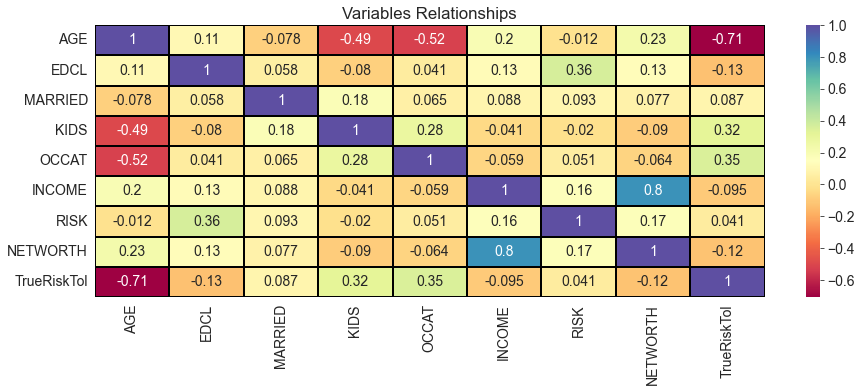

In [22]:
sns.heatmap(train.corr(), annot=True, cmap='Spectral', linewidths=0.1, linecolor='black')
plt.title('Variables Relationships');

Exploring the strongest correlations between the features and the target. 

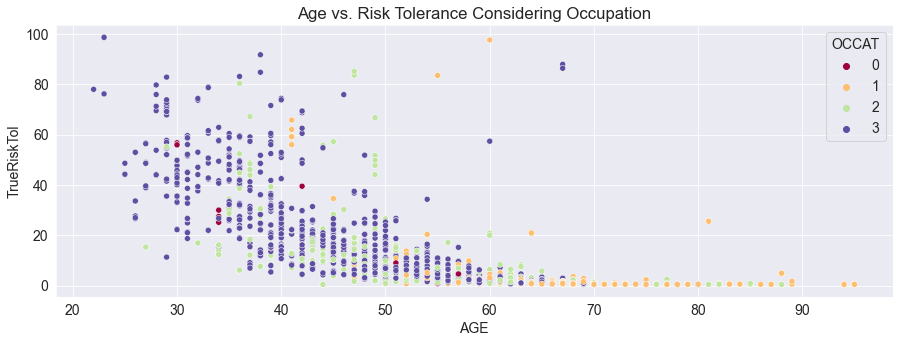

In [23]:
sns.scatterplot(data=train, x='AGE', y='TrueRiskTol', hue='OCCAT', palette='Spectral') 
plt.title('Age vs. Risk Tolerance Considering Occupation');

It is possibile to observe the negative relationship between the risk tolerance and the age. Younger people appear to have a higher risk tolerance.  
Moreover, the majority of people with high risk tolerance are employed in managerial role, while older people have a lower risk tolerance and a loer occupational category. 

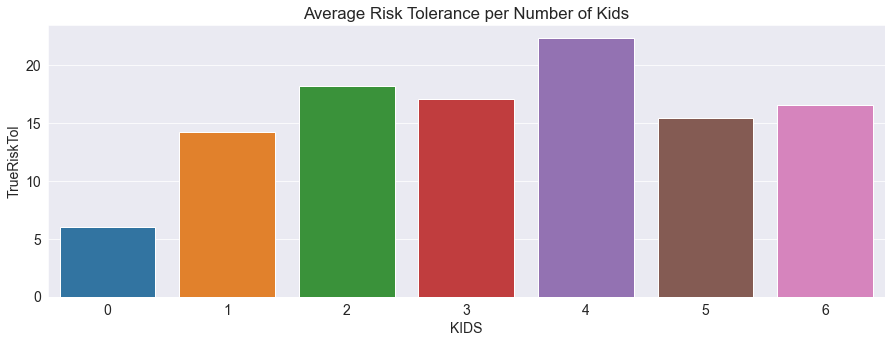

In [24]:
sns.barplot(data=train, x='KIDS', y='TrueRiskTol', ci=None, estimator='mean')
plt.title('Average Risk Tolerance per Number of Kids');

On average, people with a higher number of kids have a higher risk tolerance. 

Other continuous variables distribution. 

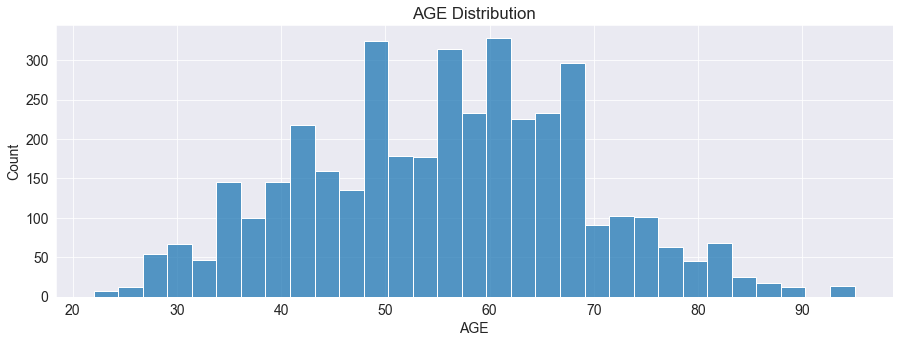

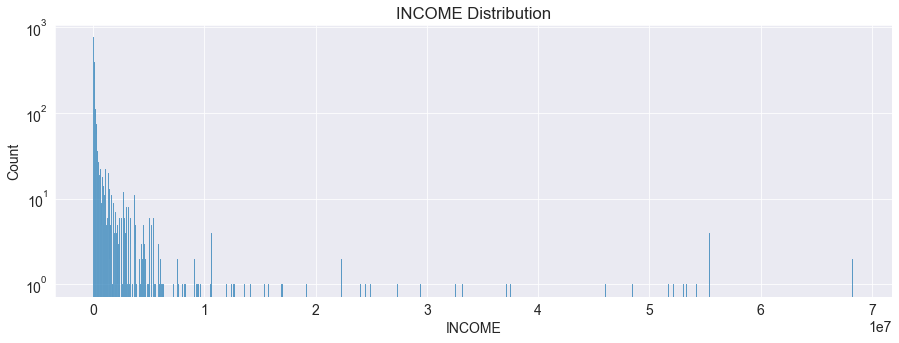

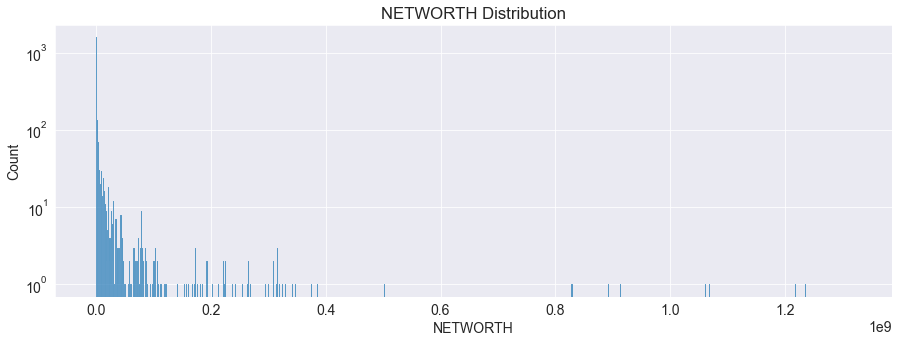

In [66]:
cont_variables = ['AGE', 'INCOME', 'NETWORTH'] 

for v in cont_variables: 
    if v != 'AGE': 
        sns.histplot(data=train, x=v) 
        plt.title(f'{v} Distribution') 
        plt.yscale('log') 
        plt.show() 
    else: 
        sns.histplot(data=train, x=v) 
        plt.title(f'{v} Distribution') 
        plt.show()

## Exploring the Target Variable

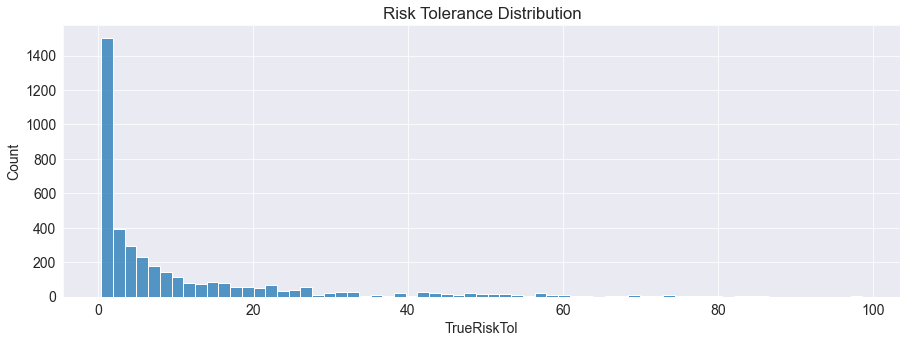

In [67]:
sns.histplot(data=train, x='TrueRiskTol') 
plt.title('Risk Tolerance Distribution');

Making four clusters based on the risk tolerance. 

In [25]:
from sklearn.cluster import KMeans

In [26]:
train_cluster = train[['TrueRiskTol']]
test_cluster = test[['TrueRiskTol']] 

cluster_model = KMeans(n_clusters=4, random_state=42).fit(train_cluster) 

train['RiskCluster'] = cluster_model.predict(train_cluster) 
test['RiskCluster'] = cluster_model.predict(test_cluster) 

Seeing the results.

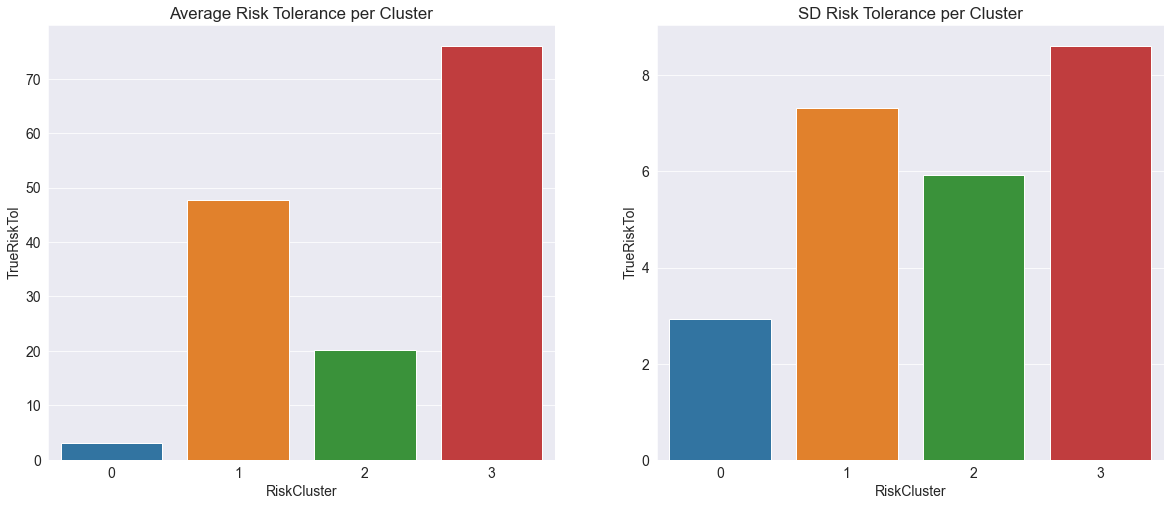

In [27]:
fig, ax = plt.subplots(1,2, figsize=(20,8)) 

ax[0].set_title('Average Risk Tolerance per Cluster')
sns.barplot(data=train, x='RiskCluster', y='TrueRiskTol', ci=None, ax=ax[0]) 

ax[1].set_title('SD Risk Tolerance per Cluster')
sns.barplot(data=train, x='RiskCluster', y='TrueRiskTol', ci=None, estimator='std', ax=ax[1]); 

A possible classification could be:  

- **Cluster 0** --> low risk tolerance  
- **Cluster 1** --> medium-high risk tolerance  
- **Cluster 2** --> medium-low risk tolerance  
- **Cluster 3** --> high risk tolerance

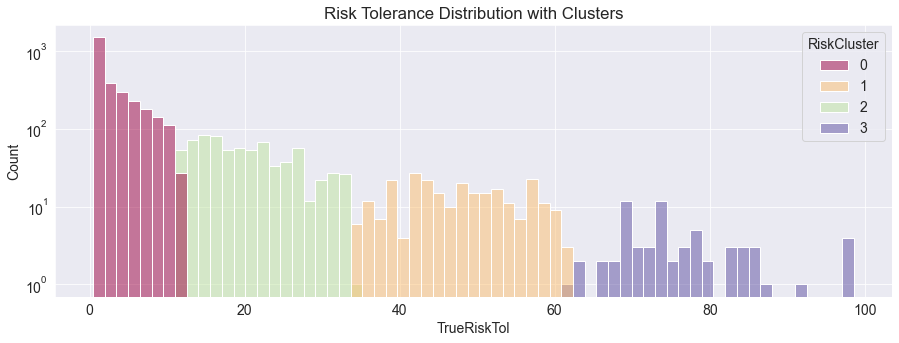

In [28]:
sns.histplot(data=train, x='TrueRiskTol', hue='RiskCluster', palette='Spectral') 
plt.title('Risk Tolerance Distribution with Clusters') 
plt.yscale('log');

Dividing people on the risk tolerance basis.

In [35]:
for x in train.RiskCluster.unique():
    print(f"Cluster {x}: {train[train.RiskCluster == x].TrueRiskTol.describe().loc[['min', 'max']]}\n")

Cluster 0: min     0.450112
max    11.589348
Name: TrueRiskTol, dtype: float64

Cluster 1: min    34.288953
max    61.553271
Name: TrueRiskTol, dtype: float64

Cluster 2: min    11.605284
max    33.812346
Name: TrueRiskTol, dtype: float64

Cluster 3: min    62.039548
max    98.604330
Name: TrueRiskTol, dtype: float64



Taking into consideration each range will be helpful for creating a the final clusters.

Storing the new datasets.

In [73]:
train.to_csv('train.csv', index=None) 
test.to_csv('test.csv', index=None)

## Mutual Information   

It is useful to understand which features better explain the target. 

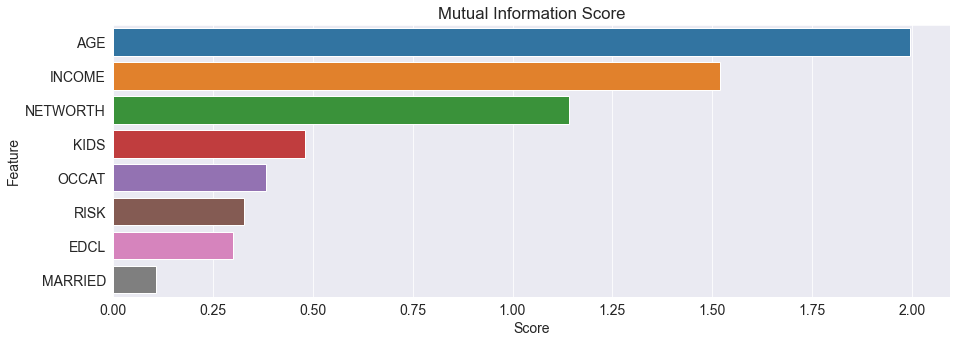

In [37]:
# Dividing train in X_train and y_train  
mi_X_train = train[train.columns[:8].to_list()]
mi_y_train = train.TrueRiskTol 

# Importing the Mutual Information algorithm  
from sklearn.feature_selection import mutual_info_regression  

# Computing it 
discrete_features = mi_X_train.dtypes == 'int64'  

mi_score = mutual_info_regression(mi_X_train, mi_y_train, discrete_features=discrete_features) 

# Storing the scores into a dataframe 
mi_score_df = pd.DataFrame({'Feature':mi_X_train.columns, 'Score':mi_score}).sort_values('Score', ascending=False) 

# Showing the results
sns.barplot(data=mi_score_df, x='Score', y='Feature')
plt.title('Mutual Information Score');

The variables AGE, INCOME and NETWORTH seem to have a higher relationship with the target. 

# Feature Engineering  

Since the main steps of feature engineering, like encoding categorical variables, have already been performed, it is possible to try another way to improve the model's score: creating new features.  
These can be based on different reasoning patterns, which, through mathematical operations, can create new features to use for the model. 

### Potentially Useful Features  

**Cultural and Occupational Status** --> the sum of the education and the occupational category: EDCL + OCCAT  
**Total Wealth** --> the total wealth composed by the income and the net worth: INCOME + NETWORTH  
**Net Worth-Age Ratio** --> the amount of net worth accumulated during the years: NETWORTH/AGE  

In [2]:
train = pd.read_csv('train.csv').drop(columns='RiskCluster')
test = pd.read_csv('test.csv').drop(columns='RiskCluster')

In [3]:
train

,AGE,EDCL,MARRIED,KIDS,OCCAT,INCOME,RISK,NETWORTH,TrueRiskTol
0,52,1,1,0,3,5.111886e+04,1,6.746919e+05,6.680193
1,66,0,1,1,1,5.005389e+04,1,8.864716e+04,1.260122
2,34,3,1,1,3,1.277972e+05,2,2.572425e+05,41.641618
3,39,2,1,2,2,1.064976e+05,1,4.370222e+05,39.079881
4,73,3,1,0,1,1.052197e+06,1,1.695066e+07,0.464278
...,...,...,...,...,...,...,...,...,...
3932,62,3,1,0,2,1.490967e+05,1,3.061227e+06,1.415664
3933,64,2,0,0,1,1.490967e+04,0,2.684269e+05,0.807397
3934,56,0,0,1,3,2.342948e+04,0,4.704720e+04,3.993526
3935,66,1,1,0,1,3.833915e+04,0,5.813845e+05,1.028866


In [3]:
# Monthly Wage 
train['monthly_wage'] = train.INCOME/12 
test['monthly_wage'] = test.INCOME/12   

# Total Wealth per Year
train['total_yearly_wealth'] = train.INCOME + train.NETWORTH 
test['total_yearly_wealth'] = test.INCOME + test.NETWORTH  

# Total Yearly Wealth - Age Ratio 
train['totwealth_age_ratio'] = train.total_yearly_wealth / train.AGE 
test['totwealth_age_ratio'] = test.total_yearly_wealth / test.AGE  

How do the new features interact with the target? 

In [6]:
train.columns

Index(['AGE', 'EDCL', 'MARRIED', 'KIDS', 'OCCAT', 'INCOME', 'RISK', 'NETWORTH',
       'TrueRiskTol', 'monthly_wage', 'total_yearly_wealth',
       'totwealth_age_ratio'],
      dtype='object')

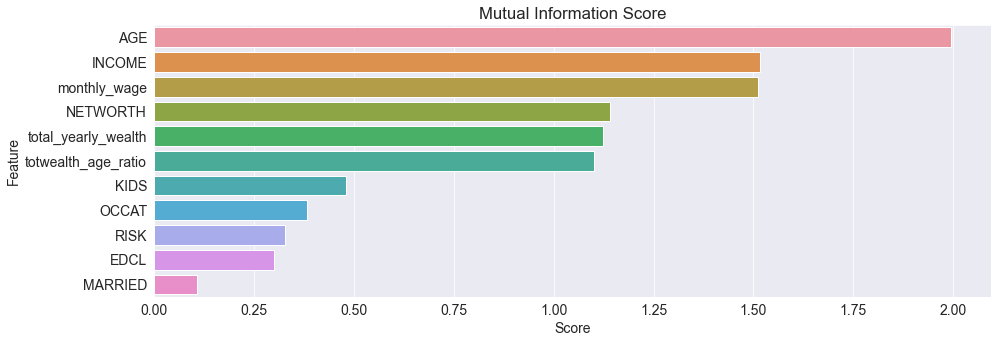

In [16]:
# Dividing train in X_train and y_train  
mi_X_train = train[['AGE', 'EDCL', 'MARRIED', 'KIDS', 'OCCAT', 'INCOME', 'RISK', 'NETWORTH', 'monthly_wage','total_yearly_wealth', 'totwealth_age_ratio']]
mi_y_train = train.TrueRiskTol

# Importing the Mutual Information algorithm  
from sklearn.feature_selection import mutual_info_regression  

# Computing it 
discrete_features = mi_X_train.dtypes == 'int64'  

mi_score = mutual_info_regression(mi_X_train, mi_y_train, discrete_features=discrete_features) 

# Storing the scores into a dataframe 
mi_score_df = pd.DataFrame({'Feature':mi_X_train.columns, 'Score':mi_score}).sort_values('Score', ascending=False) 

# Showing the results
sns.barplot(data=mi_score_df, x='Score', y='Feature')
plt.title('Mutual Information Score');

New variables seem to have a high association with the target, in particular those ones related to wealth. 

## Scaling Values  

Despite the algorithm that will be used later (XGBoost) has no problem in managing outliers, it is a good practice to scale them, even to show the process.  
Robust scaler will be used. 

### Robust Scaler

In [4]:
from sklearn.preprocessing import RobustScaler  

cols_to_scale = train.drop(columns=['TrueRiskTol', 'EDCL', 'MARRIED', 'OCCAT', 'RISK', 'KIDS']).columns.to_list() 

scaler = RobustScaler().fit(train[cols_to_scale]) 

train[cols_to_scale] = scaler.transform(train[cols_to_scale])
test[cols_to_scale] = scaler.transform(test[cols_to_scale]) 

Checking the result.

In [5]:
train[cols_to_scale].describe().loc[['min','max'],:]

,AGE,INCOME,NETWORTH,monthly_wage,total_yearly_wealth,totwealth_age_ratio
min,-1.789474,-0.383275,-1.271642,-0.383275,-1.14388,-1.727514
max,2.052632,223.344948,263.653704,223.344948,251.69592,219.506173


## One Hot Encoding 

In [5]:
from sklearn.preprocessing import OneHotEncoder  

categorical_cols = ['EDCL', 'MARRIED', 'OCCAT', 'RISK'] 

encoder = OneHotEncoder(sparse=False).fit(train[categorical_cols]) 

encoded_columns = encoder.get_feature_names_out(categorical_cols).tolist() 

train[encoded_columns] = encoder.transform(train[categorical_cols]) 
test[encoded_columns] = encoder.transform(test[categorical_cols])  

train.drop(columns=categorical_cols, inplace=True) 
test.drop(columns=categorical_cols, inplace=True)

## Splitting into Input and Target Feature

In [6]:
X_train = train.drop(columns='TrueRiskTol')
X_test = test.drop(columns='TrueRiskTol') 

y_train = train.TrueRiskTol
y_test = test.TrueRiskTol

In [11]:
X_train

,AGE,KIDS,INCOME,NETWORTH,monthly_wage,total_yearly_wealth,totwealth_age_ratio,EDCL_0,EDCL_1,EDCL_2,...,MARRIED_0,MARRIED_1,OCCAT_0,OCCAT_1,OCCAT_2,OCCAT_3,RISK_0,RISK_1,RISK_2,RISK_3
0,-0.210526,0,-0.216028,-0.011667,-0.216028,-0.022352,-0.023601,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.526316,1,-0.219512,-0.128726,-0.219512,-0.129804,-0.156097,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.157895,1,0.034843,-0.095050,0.034843,-0.084720,-0.053028,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.894737,2,-0.034843,-0.059140,-0.034843,-0.055715,-0.023841,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.894737,0,3.059233,3.239373,3.059233,3.139666,2.576356,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,0.315789,0,0.104530,0.465031,0.104530,0.432359,0.399057,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3933,0.421053,0,-0.334495,-0.092816,-0.334495,-0.103333,-0.130108,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3934,0.000000,1,-0.306620,-0.137035,-0.306620,-0.142291,-0.165518,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3935,0.526316,0,-0.257840,-0.030304,-0.257840,-0.041768,-0.074651,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
X_test

,AGE,KIDS,INCOME,NETWORTH,monthly_wage,total_yearly_wealth,totwealth_age_ratio,EDCL_0,EDCL_1,EDCL_2,...,MARRIED_0,MARRIED_1,OCCAT_0,OCCAT_1,OCCAT_2,OCCAT_3,RISK_0,RISK_1,RISK_2,RISK_3
0,-0.473684,0,-0.198606,-0.074733,-0.198606,-0.079163,-0.080813,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.684211,2,-0.296167,-0.127541,-0.296167,-0.133006,-0.148082,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.684211,2,-0.296167,-0.131868,-0.296167,-0.136971,-0.153713,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.526316,2,0.362369,-0.059843,0.362369,-0.034140,-0.018902,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.526316,2,0.362369,-0.058416,0.362369,-0.032832,-0.017166,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,-1.000000,3,-0.076655,-0.096994,-0.076655,-0.092738,-0.076522,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
433,-0.105263,0,14.808362,8.245889,14.808362,8.384181,9.476216,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
434,-0.894737,7,0.017422,0.203959,0.017422,0.188276,0.358161,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
435,-0.894737,7,0.250871,0.143164,0.250871,0.145631,0.291394,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Model Creation and Hypertuning  

In this section it will be provided the model creation and hypertuning steps.  

## Experiments  

This part has been used to run different experiments in order to choose the best one to tune later.   

The starting parameters can be found at the following link: https://medium.com/broadhorizon-cmotions/hyperparameter-tuning-for-hyperaccurate-xgboost-model-d6e6b8650a11  

In [7]:
import xgboost 
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV 

In [108]:
regression = RandomizedSearchCV(XGBRegressor(n_jobs=-1, random_state=42), {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'learning_rate': [.001, .005, .01, .05, .1, .2, .3],
    'n_estimators': [300, 500, 1000, 1500],
    'min_child_weight': [1,2,3,4,5,6,7,8,9,10],
    'subsample': [.4, .5, .6, .7, .8, .9, 1],
    'colsample_bytree': [.4, .5, .6, .7, .75, .77, .79 ,.8, .85],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_lambda':[0, 0.5, 1, 1.5, 2, 3, 4.5]
}, cv=5, n_iter=10, scoring='neg_root_mean_squared_error', return_train_score=False) 

regression.fit(X_train, y_train) 


pd.DataFrame(regression.cv_results_).sort_values('rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_lambda,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,...,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1.792212,0.010709,0.009002,0.000632,0.9,1,500,9,10,0.2,...,0.75,"{'subsample': 0.9, 'reg_lambda': 1, 'n_estimat...",-4.636492,-4.693278,-3.922924,-5.625561,-4.957159,-4.767083,0.549221,1
4,1.047383,0.004732,0.007204,0.000401,0.5,3,500,1,5,0.05,...,0.8,"{'subsample': 0.5, 'reg_lambda': 3, 'n_estimat...",-5.046939,-4.890532,-3.868347,-5.754401,-4.767834,-4.865611,0.604573,2
3,2.707495,0.035101,0.009712,0.000746,0.6,0.5,1500,4,4,0.05,...,0.7,"{'subsample': 0.6, 'reg_lambda': 0.5, 'n_estim...",-5.067042,-4.986256,-3.961964,-5.793623,-4.836149,-4.929007,0.585438,3


## Experiments Results 

### Mean scores

In [112]:
no_added_f_no_scaling = np.mean([4.68,4.58,4.54,4.70,4.6]) 
no_added_f_scaling = np.mean([4.9,4.48,4.72,4.62,4.57]) 

added_f_no_scaling = np.mean([4.29,4.65,4.67,4.56,4.51]) 
added_f_scaling = np.mean([4.38,4.78,4.55,4.85,4.51]) 

one_hot_f_scaling = np.mean([4.42,4.65,4.54,4.25,4.77])

In [113]:
print(f'No added features, no scaling: {no_added_f_no_scaling}')
print(f'No added features, scaling: {no_added_f_scaling}') 
print(f'Added features, no scaling: {added_f_no_scaling}') 
print(f'Added features, scaling: {added_f_scaling}') 
print(f'One Hot Encoding, new features and scaling: {one_hot_f_scaling}')

No added features, no scaling: 4.62
No added features, scaling: 4.658
Added features, no scaling: 4.536
Added features, scaling: 4.614
One Hot Encoding, new features and scaling: 4.526


In general, it seems that the new features improve the model performance.

### Mean fit time 

In [114]:
print(f'No added features, no scaling: {np.mean([3.77,5.08,3.05,4.45,2.8])}')
print(f'No added features, scaling: {np.mean([3.49,5,2.93,2.61,4.93])}') 
print(f'Added features, no scaling: {np.mean([4.11,2.89,1.22,4.5,3.63])}') 
print(f'Added features, scaling: {np.mean([0.91,2.08,6.74,2.82,4.06])}') 
print(f'One Hot Encoding, new features and scaling: {np.mean([3.9,4.02,1.19,5.83,1.79])}')

No added features, no scaling: 3.8299999999999996
No added features, scaling: 3.7920000000000003
Added features, no scaling: 3.2700000000000005
Added features, scaling: 3.322
One Hot Encoding, new features and scaling: 3.346


### Mean Standard Deviation 

In [115]:
print(f'No added features, no scaling: {np.mean([0.62,0.62,0.79,0.73,0.67])}')
print(f'No added features, scaling: {np.mean([0.77,0.76,0.68,0.73,0.67])}') 
print(f'Added features, no scaling: {np.mean([0.75,0.59,0.54,0.58,0.72])}') 
print(f'Added features, scaling: {np.mean([0.7,0.56,0.54,0.64,0.7])}') 
print(f'One Hot Encoding, new features and scaling: {np.mean([0.55,0.52,0.53,0.73,0.55])}')

No added features, no scaling: 0.686
No added features, scaling: 0.722
Added features, no scaling: 0.6359999999999999
Added features, scaling: 0.6279999999999999
One Hot Encoding, new features and scaling: 0.576


The last one shows the lowest standard deviation.

## Final Model Creation 

In [140]:
final_regression = RandomizedSearchCV(XGBRegressor(n_jobs=-1, random_state=42), {
    'max_depth': [15,16,17,18,19,20,21,22,23,24,25],
    'learning_rate': [.01, .03, .05, .07, .09, .1],
    'n_estimators': [1200, 1250, 1270, 1300, 1400],
    'min_child_weight': [1,2,3,4,5],
    'subsample': [.4, .5, .6, .7, .8, .9, 1],
    'colsample_bytree': [.7, .72, .74, .75, .77, .78,.79 ,.8],
    'gamma': [0.0, 0.1, .11, .12, .13, .14, .15, 0.2, 0.3],
    'reg_lambda':[0, 0.5, .7, .8, 1, 1.5, 1.7, 1.8, 2, 3]
}, cv=5, n_iter=10, scoring='neg_root_mean_squared_error', return_train_score=False) 

final_regression.fit(X_train, y_train) 


pd.DataFrame(final_regression.cv_results_).sort_values('rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_lambda,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,...,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,9.673730,0.208162,0.025404,0.002577,0.5,1.7,1300,3,25,0.05,...,0.74,"{'subsample': 0.5, 'reg_lambda': 1.7, 'n_estim...",-4.631645,-4.464683,-3.348601,-5.303694,-3.490640,-4.247853,0.733640,1
0,7.532154,0.665924,0.021709,0.001534,0.6,1.5,1300,4,18,0.05,...,0.77,"{'subsample': 0.6, 'reg_lambda': 1.5, 'n_estim...",-4.429262,-4.497711,-3.426342,-5.255282,-3.776524,-4.277024,0.632934,2
6,8.977761,0.070734,0.018506,0.001418,0.5,0,1270,2,20,0.05,...,0.77,"{'subsample': 0.5, 'reg_lambda': 0, 'n_estimat...",-4.785095,-4.488040,-3.203753,-5.333744,-3.672175,-4.296561,0.766181,3


In [141]:
final_regression.best_params_

{'subsample': 0.5,
 'reg_lambda': 1.7,
 'n_estimators': 1300,
 'min_child_weight': 3,
 'max_depth': 25,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.74}

# Evaluation   

The model's evaluation keeping the best hyperparameters. 

In [8]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

In [9]:
model = XGBRegressor(subsample=.5, reg_lambda=1.5, n_estimators=1400, min_child_weight=1, max_depth=15, 
                     learning_rate=.05, gamma=.2, colsample_bytree=.72, random_state=42, n_jobs=-1) 

model.fit(X_train, y_train) 

print(f'RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False)}')
print(f'R^2 Score: {r2_score(y_test, model.predict(X_test))}')

RMSE: 3.4357903323650762
R^2 Score: 0.9581922764905887


Normalizing the RMSE.

In [10]:
rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)  
max_val, min_val = y_test.max(), y_test.min()

print(f'Normalized RMSE: {rmse/(max_val-min_val)}')

Normalized RMSE: 0.037842732730250524


## Feature Importance  

The importance given by the model to each feature.  

Article about collinearity in XGBoost: https://vishesh-gupta.medium.com/correlation-in-xgboost-8afa649bd066

In [42]:
feature_importance_df = pd.DataFrame({
    'Feature':X_train.columns,
    'Importance':model.feature_importances_
})

feature_importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
0,AGE,0.258717
16,OCCAT_3,0.075281
14,OCCAT_1,0.072569
3,NETWORTH,0.062379
9,EDCL_2,0.055767
11,MARRIED_0,0.046099
1,KIDS,0.042275
15,OCCAT_2,0.040460
18,RISK_1,0.036594
6,totwealth_age_ratio,0.035928


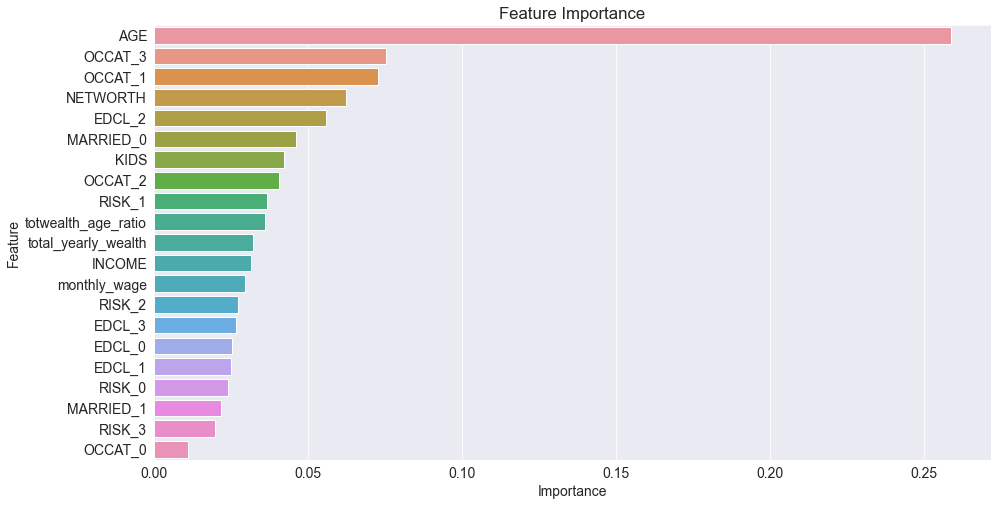

In [44]:
plt.figure(figsize=(15,8))
sns.barplot(data=feature_importance_df.sort_values('Importance', ascending=False), x='Importance', y='Feature') 
plt.title('Feature Importance');

Without "monthly_wage". 

In [39]:
feature_importance_df = pd.DataFrame({
    'Feature':X_train.columns,
    'Importance':model.feature_importances_
})

feature_importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
0,AGE,0.258717
16,OCCAT_3,0.075281
14,OCCAT_1,0.072569
3,NETWORTH,0.062379
9,EDCL_2,0.055767
11,MARRIED_0,0.046099
1,KIDS,0.042275
15,OCCAT_2,0.040460
18,RISK_1,0.036594
6,totwealth_age_ratio,0.035928


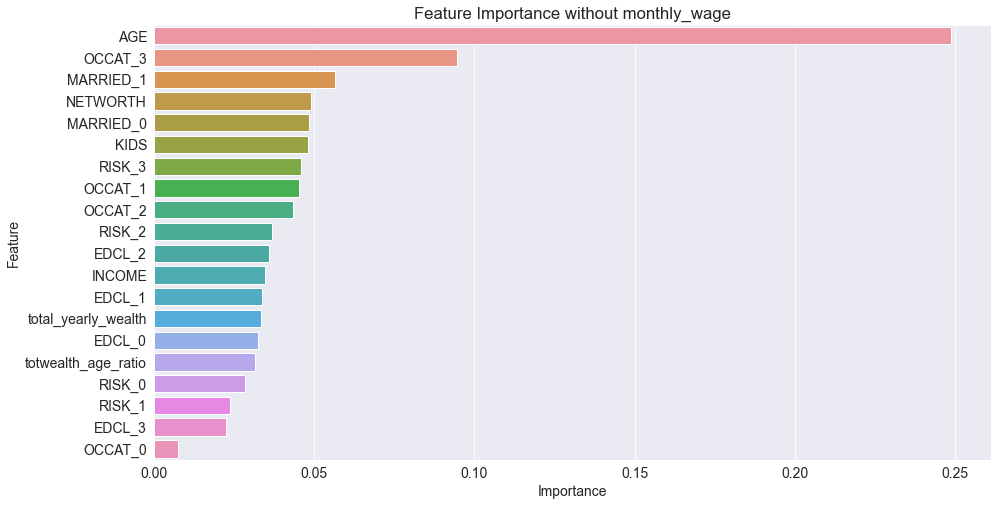

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=feature_importance_df.sort_values('Importance', ascending=False), x='Importance', y='Feature') 
plt.title('Feature Importance without monthly_wage');

As it was predictable, the age has the highest weight.

Displaying the model.

In [11]:
from xgboost import plot_tree 
import graphviz

In [ ]:
plot_tree(model, num_trees=1);

# Saving the Model  

It is necessary to store it for future use, without having to train it each time. 

In [145]:
import joblib 

In [156]:
final_risk_calculator = {'model': model, 'scaler':scaler, 'encoder':encoder, 'cols_to_scale':cols_to_scale,
                         'categorical_cols':categorical_cols, 'encoded_columns':encoded_columns, 
                         'input_columns':X_train.columns.to_list(), 'target_column':'TrueRiskTol'}

joblib.dump(final_risk_calculator, 'dissertation_model.joblib') 

['dissertation_model.joblib']

Making predictions after loading it. 

In [157]:
rcc = joblib.load('dissertation_model.joblib')  
rcc

{'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.72, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1400, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...),
 'scaler': RobustScaler(),
 'encoder': OneHotEncoder(sparse=False, sparse_output=False),
 'cols_to_scale': ['AGE',
  'INCOME',
  'NETWORTH',
  'monthly_wage',
  'total_yearly_wealth',
  'totwealth_age_ratio'],
 'categorical_cols': ['EDCL', 'MARRIE

In [158]:
print(f"RMSE: {mean_squared_error(y_test, rcc['model'].predict(X_test), squared=False)}")
print(f"R^2 Score: {r2_score(y_test, rcc['model'].predict(X_test))}")

RMSE: 3.4357903323650762
R^2 Score: 0.9581922764905887


# Creating an Interface with Gradio   

It will be created an interface to use in the real life. 

Creating a function to submit in the interface.

In [45]:
def risk_calculator(age, education, married, kids, occat, income, risk, networth): 
    # defining a new input 
    new_input = {
        'AGE':[age], 
        'EDCL':[education], 
        'MARRIED':[married], 
        'KIDS':[kids], 
        'OCCAT':[occat], 
        'INCOME':[income], 
        'RISK':[risk], 
        'NETWORTH':[networth]
    }

    # creating a dataframe
    df = pd.DataFrame(new_input) 

    # encoding categorical variables
    df['MARRIED'] = df.MARRIED.map({'no':0, 'yes':1})
    df['EDCL'] = df.EDCL.map({'no high school':0, 'high school':1, 'college bachelor degree':2, 'college master degree': 3})
    df['OCCAT'] = df.OCCAT.map({'unemployed':0, 'low-tier worker':1, 'middle management':2, 'top management':3})
    df['RISK'] = df.RISK.map({'low-level':0, 'middle-low':1, 'middle-high':2, 'high':3})

    # creating new variables
    df['c_o_status'] = df.EDCL + df.OCCAT 
    df['total_wealth'] = df.INCOME + df.NETWORTH  
    df['networth_age_ratio'] = df.NETWORTH / df.AGE  

    # scaling 
    df[cols_to_scale] = scaler.transform(df[cols_to_scale])  

    # making predictions
    pred = float(model.predict(df)[0])
    return pred

In [46]:
risk_calculator(23, 'college bachelor degree', 'no', 0, 'unemployed', 0, 'middle-low', 100000)

54.17268753051758

Building the interface. 

In [16]:
import gradio as gr

In [48]:
with gr.Blocks() as interface:
    gr.Markdown('''
    **Risk Tolerance PRedictor**
    ''')
    with gr.Row():
        with gr.Column(): 
            age = gr.Slider(label='Age', minimum=18, maximum=120, step=1, randomize=True)
            education = gr.Radio(['no high school', 'high school', 'college bachelor degree', 'college master degree'], label='Education') 
            married = gr.Radio(['yes', 'no'], label='Married')
            kids = gr.Slider(label='Children', minimum=0, maximum=10, step=1, randomize=True)
            occupation = gr.Radio(['unemployed', 'low-tier worker', 'middle management', 'top management'], label='Occupation') 
            income = gr.Slider(label='Income', minimum=0, maximum=120000000000, step=10000, randomize=True) 
            risk = gr.Radio(['low-level', 'middle-low', 'middle-high', 'high'], label='Risk Willingness') 
            networth = gr.Slider(label='Net Worth', minimum=-120000000000, maximum=120000000000, step=10000, randomize=True) 
        with gr.Column():
            label = gr.Label()
            with gr.Row():
                pred_button = gr.Button(value='Predict') 
            pred_button.click(
                risk_calculator,
                inputs=[
                age,
                education, 
                married, 
                kids, 
                occupation, 
                income,
                risk,
                networth
                ],
                outputs=label
            ) 

interface.launch()

Running on local URL:  http://127.0.0.1:7868

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app
